In [4]:
import pandas as pd 
%matplotlib inline

In [13]:
import numpy as np

In [5]:
data = pd.read_csv('./train.csv')

In [7]:
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Существует ли "счастливый" билет?


Существует ли корелляция между выживаемостью и номером билета пассажира?

In [25]:
data.drop_duplicates().shape

(891, 12)

In [26]:
a=data.groupby(['Ticket']).Survived.count()
print(a.sort_values(ascending=False))


Ticket
CA. 2343    7
1601        7
347082      7
347088      6
CA 2144     6
           ..
PC 17601    1
349239      1
349240      1
349241      1
347464      1
Name: Survived, Length: 681, dtype: int64


In [42]:
data[data['Ticket'].map(lambda x: x.endswith('0'))].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
73,74,0,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S


In [53]:
data["last_number"] = data["Ticket"].apply(lambda x: x[-1])

In [47]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,last_number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,9
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,6
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,7
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,9


In [60]:
data.sort_values(['last_number'], ascending=[True]).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,last_number
411,412,0,3,"Hart, Mr. Henry",male,NaN,0,0,394140,6.8583,NaN,Q,0
684,685,0,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.0000,NaN,S,0
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,0
342,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,0
455,456,1,3,"Jalsevac, Mr. Ivan",male,29.0,0,0,349240,7.8958,NaN,C,0


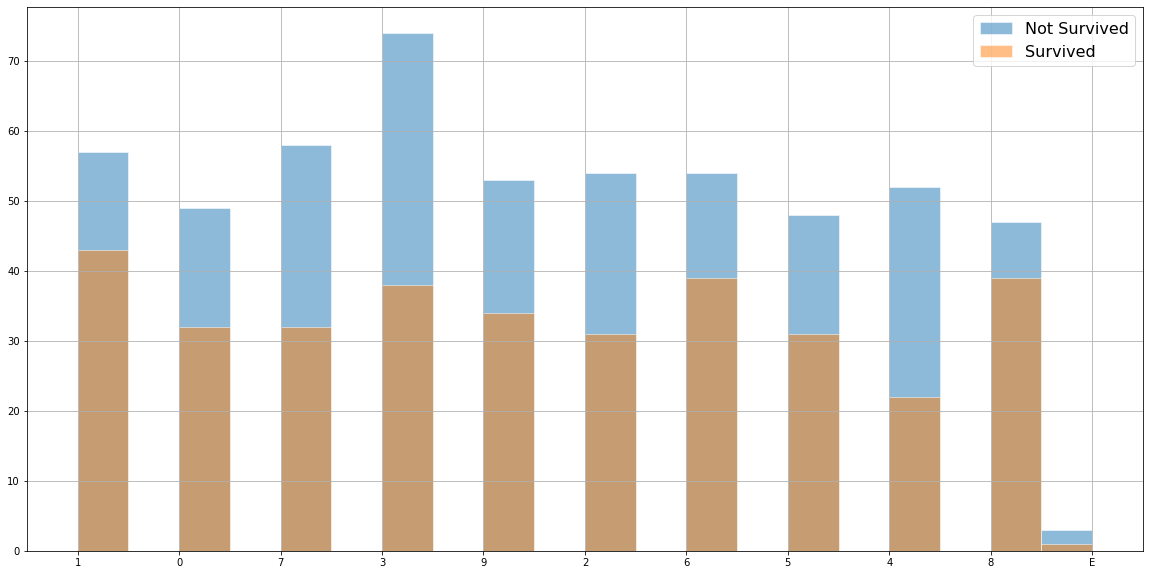

In [70]:
ax =data[data.Survived == 0]['last_number'].hist(figsize=(20, 10), bins=20, edgecolor='white', alpha=0.5)
data[data.Survived == 1]['last_number'].hist(figsize=(20, 10), bins=20, edgecolor='white', alpha=0.5)
ax.legend(['Not Survived', 'Survived'], prop={'size':16})



Таким образом, мы обнаружили, что пассажирам с последней цифрой билета "8" повезло больше, чем пассажирам с "4", и, возможно, "счастливый" билет действительно существует

# Порт, в котором садились пассижиры, и их пол могли повлиять на смертность?

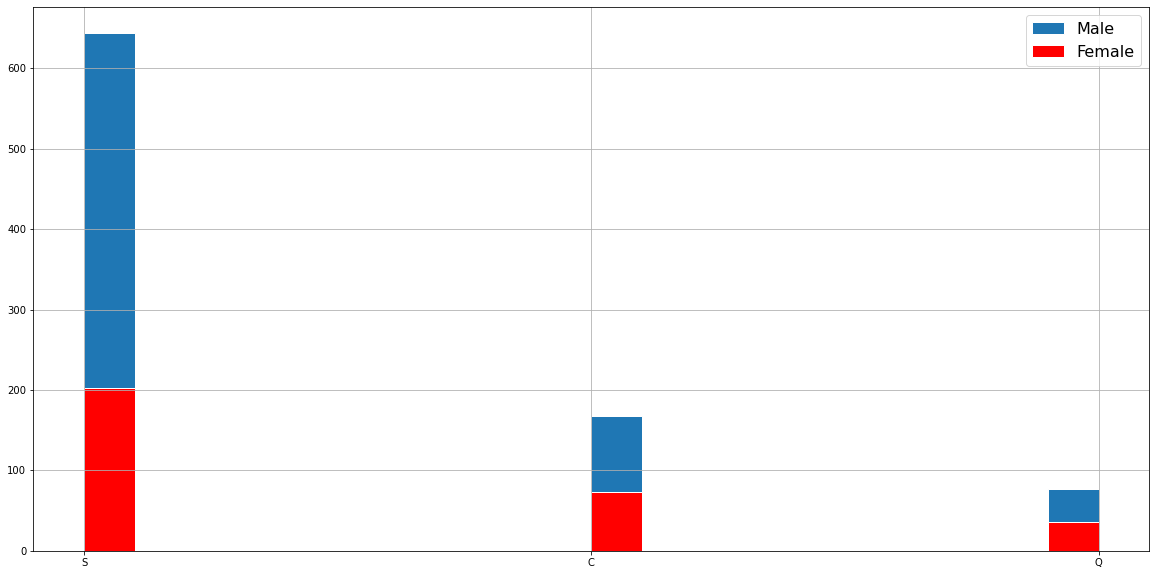

In [68]:
ax = data['Embarked'].hist(figsize=(20, 10), bins=20, edgecolor='white', grid=True)

data[data['Sex'] == 'female']['Embarked'].hist(figsize=(20, 10), bins=20, 
                                          edgecolor='white', grid=True, color='red')
ax.legend(['Male', 'Female'], prop={'size':16})

В каждом порту примерно одинаковое соотношение мужчин и женщин

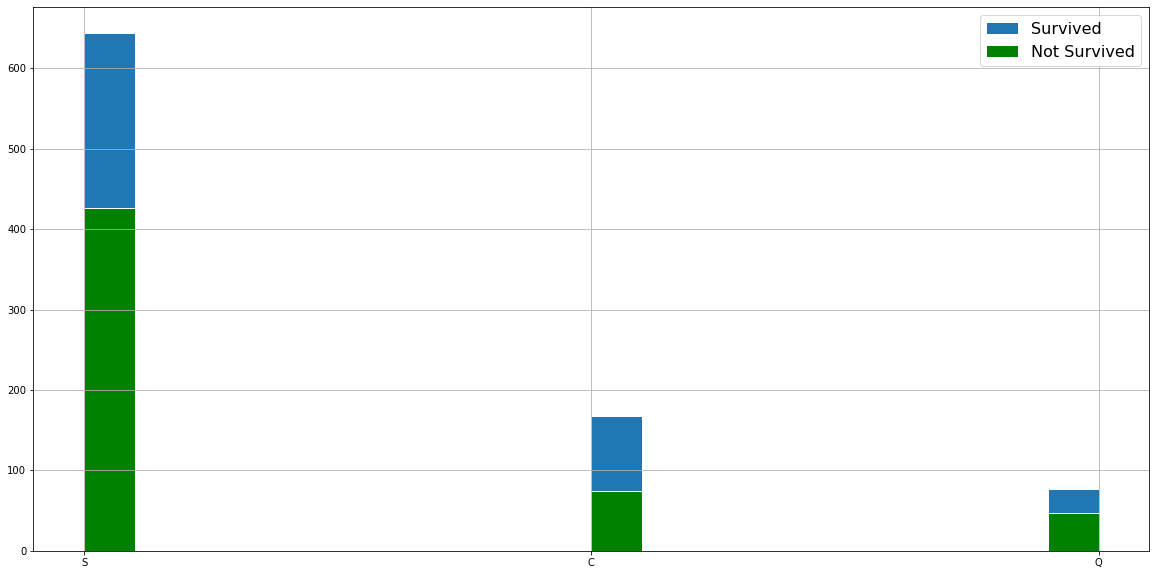

In [72]:
ax = data['Embarked'].hist(figsize=(20, 10), bins=20, edgecolor='white', grid=True)

data[data['Survived'] == 0]['Embarked'].hist(figsize=(20, 10), bins=20, 
                                          edgecolor='white', grid=True, color='green')
ax.legend(['Survived', 'Not Survived'], prop={'size':16})

Процент погибших меньше всего в порту C, больше всего - в порту Q, следовательно, порт мог иметь значение. Возможно, третий класс оказался переполненным, поэтому некоторых пассажиров третьего класса посадили во второй класс, что повысило их шансы выжить.

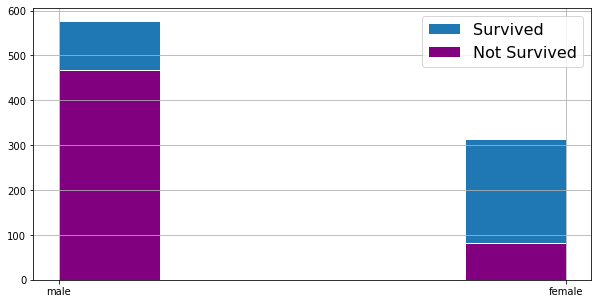

In [78]:
ax = data['Sex'].hist(figsize=(20, 10), bins=5, edgecolor='white', grid=True)

data[data['Survived'] == 0]['Sex'].hist(figsize=(10, 5), bins=5, 
                                          edgecolor='white', grid=True, color='purple')
ax.legend(['Survived', 'Not Survived'], prop={'size':16})

Процент выживших женщин гораздо больше, тк в первую очередь на шлюпки сажали женщин.
